In [1]:
import utils

/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-BlockedUnlockPickup-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N1-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N2-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding

In [2]:
env = utils.make_env('MiniGrid-FakeLava-5x5-3x4-v0')
env.reset()

({'image': array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [4, 2, 0],
          [3, 1, 0],
          [3, 1, 0],
          [3, 1, 0],
          [1, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [4, 2, 0],
          [3, 1, 0],
          [3, 1, 0],
          [3, 1, 0],
          [1, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [4, 2, 0],
          [3, 1, 0],
          [3, 1, 0],
          [3, 1, 0],
          [1, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [4, 2, 0],
          [1, 0, 0],
 

In [3]:
import numpy as np

In [4]:
def si(cells, func):
    grid = np.zeros((cells,23*17))
    for i in range(23):
        for j in range(17):
            response = func.activation((i+1,j+1))
            grid[:,i*17+j] = response
    mean = grid.mean(axis=1)
    info =  np.multiply(grid, np.log2(np.divide(grid, mean[None].T)))
    return info.mean()

In [5]:
def mean_info(sd, cells, n):
    minfo = np.zeros(n)
    for i in range(n):
        fake_pc = utils.FakePlaceCells(env, cells, sd, i)
        minfo[i] = si(cells, fake_pc)
    return minfo.mean()

In [18]:
g1 = mean_info(1, 100, 100)
g1

0.06969241887621168

In [12]:
g2 = mean_info(2, 100, 100)
g2

0.15542040123203013

In [13]:
g3 = mean_info(3, 100, 100)
g3

0.21024145204363762

In [14]:
g4 = mean_info(4, 100, 100)
g4

0.22894192271999966

In [15]:
g5 = mean_info(5, 100, 100)
g5

0.21971896460901635

In [16]:
g6 = mean_info(6, 100, 100)
g6

0.19450599844768152

In [6]:
g7 = mean_info(7, 100, 100)
g7

0.16349141563940328

In [7]:
g8 = mean_info(8, 100, 100)
g8

0.13312844629450765

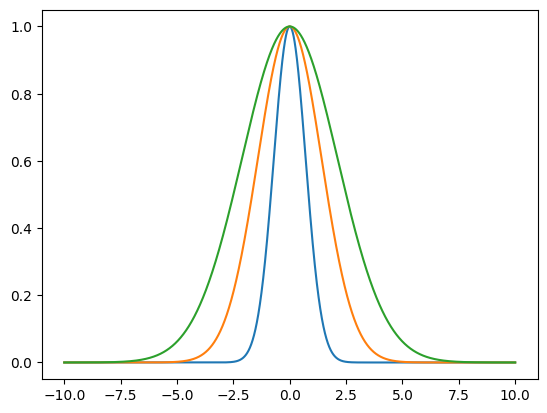

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate

distribution_function1 = lambda x: (norm.pdf(x, 0, 1)**2)/(norm.pdf(0, 0, 1)**2)
distribution_function2 = lambda x: (norm.pdf(x, 0, 2)**2)/(norm.pdf(0, 0, 2)**2)
distribution_function3 = lambda x: (norm.pdf(x, 0, 3)**2)/(norm.pdf(0, 0, 3)**2)

step = 0.001
whole_x = np.arange(-10, 10, step)
whole_y1 = list(map(distribution_function1, whole_x))
whole_y2 = list(map(distribution_function2, whole_x))
whole_y3 = list(map(distribution_function3, whole_x))

plt.plot(whole_x, whole_y1)
plt.plot(whole_x, whole_y2)
plt.plot(whole_x, whole_y3)
plt.show()

In [2]:
import torch
a=torch.zeros((2,5))
b = torch.ones((2,1))
torch.cat((a,b),dim=1)

tensor([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.]])

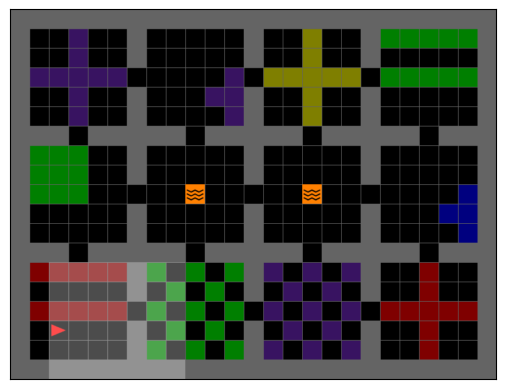

In [6]:
from minigrid.utils.window import Window
window = Window("minigrid - " + str(env.__class__))
frame = env.get_frame(agent_pov=False)
window.show_img(frame)

In [1]:
import os
import shutil
import utils
os.environ['RL_STORAGE'] = '/network/scratch/a/aleksei.efremov/'
model_name = '26_01_23_Lava_target_4x4_FO'

/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-BlockedUnlockPickup-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N1-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N2-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding

In [2]:
model_dir = os.path.join('storage', model_name)
status = utils.get_status(model_dir)

In [3]:
status

{'num_frames': 1433600,
 'update': 700,
 'model_state': OrderedDict([('image_conv.0.weight',
               tensor([[[[ 0.1539, -0.1327],
                         [-0.0924,  0.0984]],
               
                        [[-0.3610,  0.1747],
                         [-0.1117,  0.1312]],
               
                        [[ 0.1981, -0.0353],
                         [ 0.2921, -0.0729]]],
               
               
                       [[[ 0.0539, -0.1705],
                         [-0.0869, -0.0776]],
               
                        [[-0.0157, -0.0820],
                         [ 0.1761,  0.0330]],
               
                        [[-0.1131, -0.1743],
                         [-0.0089, -0.0635]]],
               
               
                       [[[-0.1012, -0.0180],
                         [ 0.1321,  0.1483]],
               
                        [[-0.2932,  0.1535],
                         [ 0.0294,  0.2481]],
               
                 

In [ ]:
model_dir = utils.get_model_dir(model_name)
shutil.move(model_dir, os.path.join('storage', model_name))